In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [5]:
data=pd.read_csv('/content/preprocessed_data.csv')
data.head()

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,MonthlyCharges,Churn
0,0,0,0,1,0,1,0,0,29.85,0
1,1,0,0,34,1,1,0,1,56.95,0
2,1,0,0,2,1,1,0,0,53.85,1
3,1,0,0,45,0,1,0,1,42.30,0
4,0,0,0,2,1,1,1,0,70.70,1


In [7]:
train=pd.read_csv('/content/train_set.csv')
test=pd.read_csv('/content/test_set.csv')

In [8]:
X=train.drop('Churn',axis=1)
y=train['Churn']

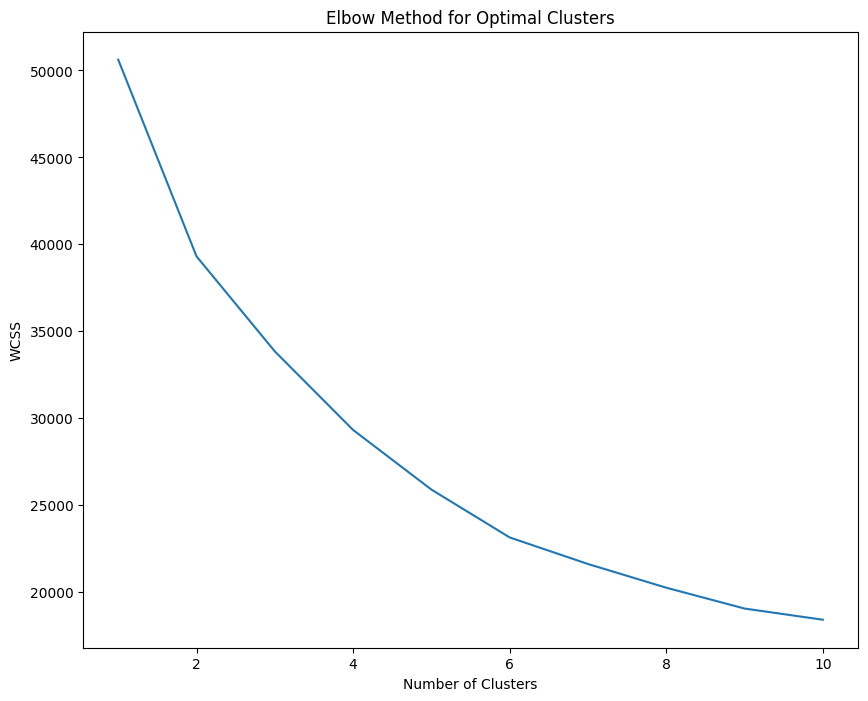

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
#he plot decreases sharply as the number of clusters increases from 1 to around 3 or 4. ,the "elbow" seems to be around 3 or 4 clusters. This is the point after which the decrease in WCSS becomes less pronounced.

In [11]:
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# PCA for dimensionality reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

optimal_clusters = 3

# K-Means clustering
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', n_init=10, max_iter=300, random_state=42)
clusters = kmeans.fit_predict(principal_components)


silhouette_avg = silhouette_score(principal_components, clusters)

print(f"Silhouette Score: {silhouette_avg}")




Silhouette Score: 0.44061445320056297


<ipython-input-12-1d77f81f2f75>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = ListedColormap(plt.cm.get_cmap('viridis', optimal_clusters).colors)


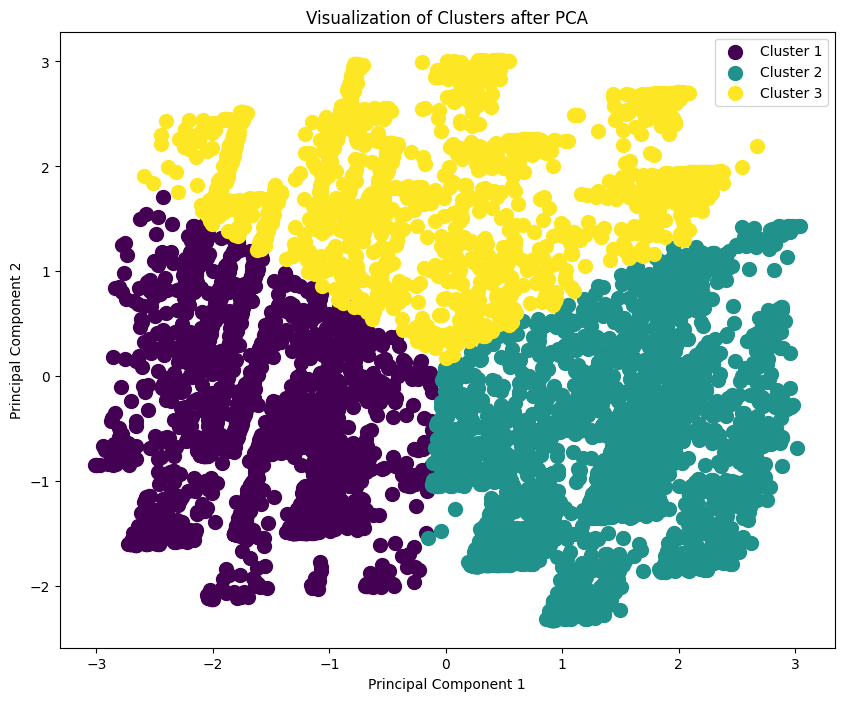

In [12]:
from matplotlib.colors import ListedColormap

# Visualization with dynamic color mapping
cmap = ListedColormap(plt.cm.get_cmap('viridis', optimal_clusters).colors)
plt.figure(figsize=(10, 8))
for i in range(optimal_clusters):
    plt.scatter(principal_components[clusters == i, 0], principal_components[clusters == i, 1],
                s=100, color=cmap(i), label=f'Cluster {i+1}')

plt.title('Visualization of Clusters after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [14]:

import pickle

# Save the KMeans model
filename = 'kmeans_model.sav'
pickle.dump(kmeans, open(filename, 'wb'))




In [15]:


import pickle
from sklearn.decomposition import PCA

# Load the trained KMeans model
filename = 'kmeans_model.sav'
kmeans = pickle.load(open(filename, 'rb'))

X_test = test.drop('Churn', axis=1)

# PCA for dimensionality reduction on test data
pca = PCA(n_components=2)
principal_components_test = pca.fit_transform(X_test)

# Predict clusters for test data using the loaded model
test_clusters = kmeans.predict(principal_components_test)


print(test_clusters)


[0 0 2 ... 0 2 0]


Silhouette Score (Test): 0.43450683514391497


<ipython-input-18-8c080c77f308>:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', optimal_clusters)


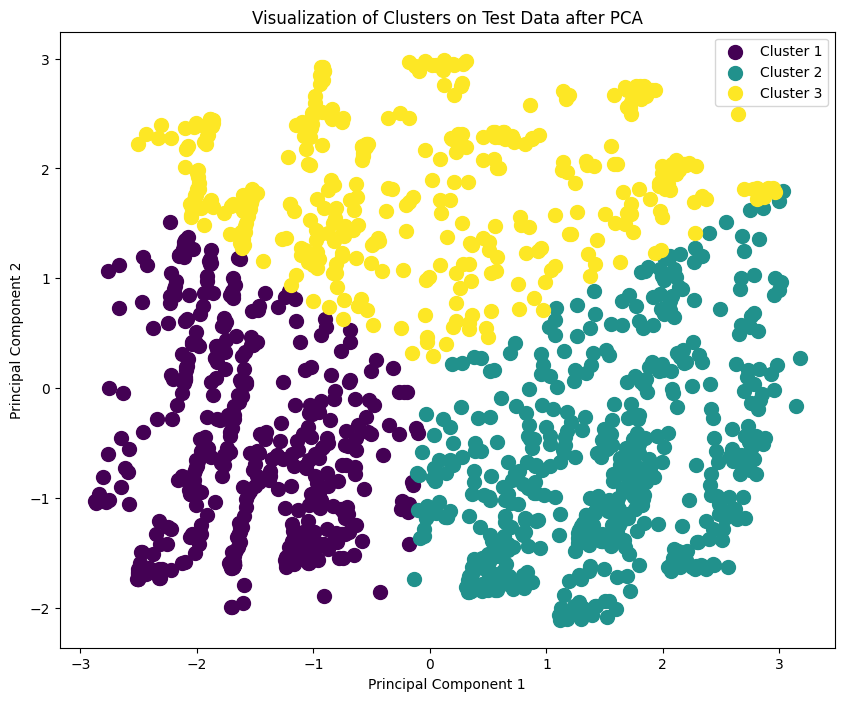

In [18]:
# prompt: evaluate and visualize




# Evaluate the clustering quality
silhouette_avg_test = silhouette_score(principal_components_test, test_clusters)

print(f"Silhouette Score (Test): {silhouette_avg_test}")


pca = PCA(n_components=2)
principal_components_test = pca.fit_transform(X_test)

# Visualization with dynamic color mapping
cmap = plt.cm.get_cmap('viridis', optimal_clusters)
plt.figure(figsize=(10, 8))
for i in range(optimal_clusters):
    plt.scatter(principal_components_test[test_clusters == i, 0], principal_components_test[test_clusters == i, 1],
                s=100, color=cmap(i), label=f'Cluster {i+1}')

plt.title('Visualization of Clusters on Test Data after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()
